#### Q2 
#### 1. Let's check whether floating-point numbers obey certain algebraic rules.                                                                               Associative rule for addition says (x + y) + z == x + (y + z). Check association rule using x = 0.1, y = 0.1 and z = 1.0 in Julia. Explain what you find.

In [1]:
x = 0.1
y = 0.1
z = 1.0

1.0

In [7]:
a = (x + y) + z
b = x + (y + z)

a, b

(1.2,1.2000000000000002)

#### Explanation: 
Doesn't follow assocaitaive rule for addition

#### 2. Do floating-point numbers obey the associative rule for multiplication: (x \* y) \* z == x \* (y \* z)?

In [11]:
a = (x * y) * z
b = x * (y * z)
@show a == b

a == b = true


true

#### Explanation:

Follow assocaitaive rule for multiplication


#### 3. Do floating-point numbers obey the distributive rule: a \* (x + y) == a \* x + a \* y?

#### 4. Is 0 * x == 0 true for all floating-point number x?

In [12]:
x = 1.0
0 * x == 0

true

In [13]:
x = 2.3
0 * x == 0

true

In [14]:
x = 1.9547
0 * x == 0

true

In [15]:
x = 3.00000000009
0 * x == 0

true

#### Explanation:
Yes, its true for all floating-point number x

#### 5. Is x / a == x * (1 / a) always true?


In [16]:
# x > a:
x = 7.4
a = 2.6

x / a == x * (1 / a)

true

In [18]:
# x < a:
x = 1.78
a = 5.24

x / a == x * (1 / a)

false

#### Explanation:
No, only when x is greater than a

#### Q3

Consider Julia function

function g(k) \newline
    for i = 1:10\newline
        k = 5k - 1 \newline
    end \newline
    k \newline
end \newline

    Use @code_llvm to find the LLVM bitcode of compiled g with Int64 input.
    Use @code_llvm to find the LLVM bitcode of compiled g with Float64 input.
    Compare the bitcode from questions 1 and 2. What do you find?
    Read Julia documentation on @fastmath and repeat the questions 1-3 on the function

function g_fastmath(k)  
    @fastmath for i = 1:10  
        k = 5k - 1
    end
    k
end

Explain what does macro @fastmath do?


In [20]:
function g(k)
    for i = 1:10
        k = 5k - 1
    end
    k
end

g (generic function with 1 method)

In [21]:
@code_llvm g(Int64)


define %jl_value_t* @julia_g_21763(%jl_value_t*, %jl_value_t**, i32) {
top:
  %3 = alloca [5 x %jl_value_t*], align 8
  %.sub = getelementptr inbounds [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 0
  %4 = getelementptr [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 2
  %5 = getelementptr [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 3
  %6 = bitcast [5 x %jl_value_t*]* %3 to i64*
  store i64 6, i64* %6, align 8
  %7 = getelementptr [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 1
  %8 = load i64, i64* bitcast (%jl_value_t*** @jl_pgcstack to i64*), align 8
  %9 = bitcast %jl_value_t** %7 to i64*
  store i64 %8, i64* %9, align 8
  store %jl_value_t** %.sub, %jl_value_t*** @jl_pgcstack, align 8
  store %jl_value_t* null, %jl_value_t** %5, align 8
  %10 = getelementptr [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 4
  store %jl_value_t* null, %jl_value_t** %10, align 8
  %11 = bitcast %jl_value_t** %1 to i64*
  %12 = load i64, i64* %11, align 8


In [22]:
@code_llvm g(Float64)


define %jl_value_t* @julia_g_21763(%jl_value_t*, %jl_value_t**, i32) {
top:
  %3 = alloca [5 x %jl_value_t*], align 8
  %.sub = getelementptr inbounds [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 0
  %4 = getelementptr [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 2
  %5 = getelementptr [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 3
  %6 = bitcast [5 x %jl_value_t*]* %3 to i64*
  store i64 6, i64* %6, align 8
  %7 = getelementptr [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 1
  %8 = load i64, i64* bitcast (%jl_value_t*** @jl_pgcstack to i64*), align 8
  %9 = bitcast %jl_value_t** %7 to i64*
  store i64 %8, i64* %9, align 8
  store %jl_value_t** %.sub, %jl_value_t*** @jl_pgcstack, align 8
  store %jl_value_t* null, %jl_value_t** %5, align 8
  %10 = getelementptr [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 4
  store %jl_value_t* null, %jl_value_t** %10, align 8
  %11 = bitcast %jl_value_t** %1 to i64*
  %12 = load i64, i64* %11, align 8


In [23]:
function g_fastmath(k)  
    @fastmath for i = 1:10  
        k = 5k - 1
    end
    k
end

g_fastmath (generic function with 1 method)

In [24]:
@code_llvm g_fastmath(Int64)


define %jl_value_t* @julia_g_fastmath_21765(%jl_value_t*, %jl_value_t**, i32) {
top:
  %3 = alloca [5 x %jl_value_t*], align 8
  %.sub = getelementptr inbounds [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 0
  %4 = getelementptr [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 2
  %5 = getelementptr [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 3
  %6 = bitcast [5 x %jl_value_t*]* %3 to i64*
  store i64 6, i64* %6, align 8
  %7 = getelementptr [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 1
  %8 = load i64, i64* bitcast (%jl_value_t*** @jl_pgcstack to i64*), align 8
  %9 = bitcast %jl_value_t** %7 to i64*
  store i64 %8, i64* %9, align 8
  store %jl_value_t** %.sub, %jl_value_t*** @jl_pgcstack, align 8
  store %jl_value_t* null, %jl_value_t** %5, align 8
  %10 = getelementptr [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 4
  store %jl_value_t* null, %jl_value_t** %10, align 8
  %11 = bitcast %jl_value_t** %1 to i64*
  %12 = load i64, i64* %11,

In [25]:
@code_llvm g_fastmath(Float64)


define %jl_value_t* @julia_g_fastmath_21765(%jl_value_t*, %jl_value_t**, i32) {
top:
  %3 = alloca [5 x %jl_value_t*], align 8
  %.sub = getelementptr inbounds [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 0
  %4 = getelementptr [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 2
  %5 = getelementptr [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 3
  %6 = bitcast [5 x %jl_value_t*]* %3 to i64*
  store i64 6, i64* %6, align 8
  %7 = getelementptr [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 1
  %8 = load i64, i64* bitcast (%jl_value_t*** @jl_pgcstack to i64*), align 8
  %9 = bitcast %jl_value_t** %7 to i64*
  store i64 %8, i64* %9, align 8
  store %jl_value_t** %.sub, %jl_value_t*** @jl_pgcstack, align 8
  store %jl_value_t* null, %jl_value_t** %5, align 8
  %10 = getelementptr [5 x %jl_value_t*], [5 x %jl_value_t*]* %3, i64 0, i64 4
  store %jl_value_t* null, %jl_value_t** %10, align 8
  %11 = bitcast %jl_value_t** %1 to i64*
  %12 = load i64, i64* %11,

#### Explanation

#### Q4
Create the vector x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012).

Plot the polynomial y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x -1 at points x.

Plot the polynomial y = (x - 1)^7 at points x.

Explain what you found.


In [69]:
x = collect(0.988:0.001:1.012)

25-element Array{Float64,1}:
 0.988
 0.989
 0.99 
 0.991
 0.992
 0.993
 0.994
 0.995
 0.996
 0.997
 0.998
 0.999
 1.0  
 1.001
 1.002
 1.003
 1.004
 1.005
 1.006
 1.007
 1.008
 1.009
 1.01 
 1.011
 1.012

In [70]:
y = x .^ 7 - 7 * x .^ 6 + 21 * x .^ 5 - 35 * x .^ 4 + 35 * x.^ 3 - 21 * x .^ 2 + 7 * x - 1

25-element Array{Float64,1}:
 -3.90799e-14
 -2.66454e-14
 -1.42109e-14
 -7.99361e-15
 -2.66454e-15
  6.21725e-15
 -8.88178e-15
  0.0        
 -1.77636e-15
 -2.66454e-15
 -8.88178e-16
 -1.77636e-15
  0.0        
 -5.32907e-15
  8.88178e-16
  5.32907e-15
 -1.77636e-15
  2.66454e-15
 -1.77636e-15
  0.0        
 -4.44089e-15
 -3.55271e-15
  0.0        
  1.5099e-14 
  4.61853e-14


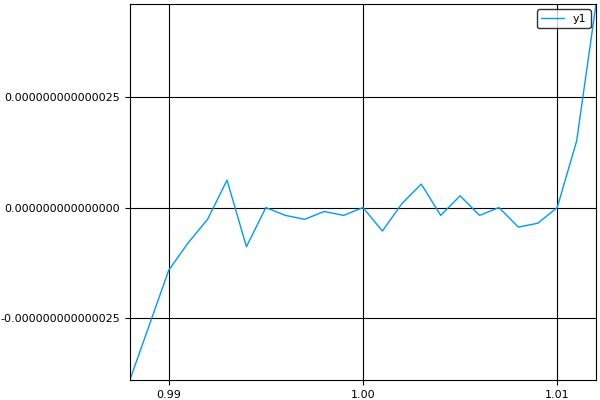

In [71]:
using Plots
pyplot()
plot(x, y)

In [72]:
y = (x - 1) .^ 7

25-element Array{Float64,1}:
 -3.58318e-14
 -1.94872e-14
 -1.0e-14    
 -4.78297e-15
 -2.09715e-15
 -8.23543e-16
 -2.79936e-16
 -7.8125e-17 
 -1.6384e-17 
 -2.187e-18  
 -1.28e-19   
 -1.0e-21    
  0.0        
  1.0e-21    
  1.28e-19   
  2.187e-18  
  1.6384e-17 
  7.8125e-17 
  2.79936e-16
  8.23543e-16
  2.09715e-15
  4.78297e-15
  1.0e-14    
  1.94872e-14
  3.58318e-14


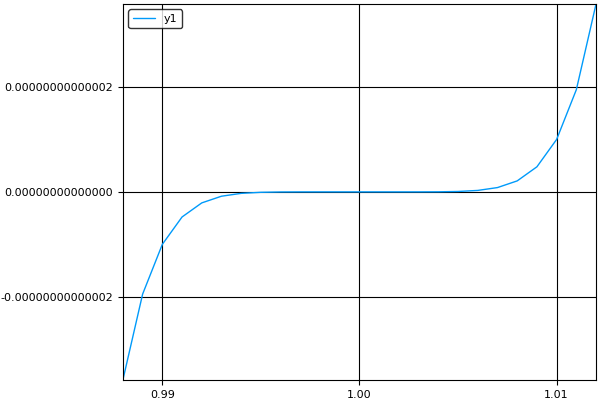

In [73]:
pyplot()
plot(x, y)

#### Q5

Let the n×n matrix H have elements H[i, j] = 1 / (i + j - 1).

Write a function h(n) that outputs n×n matrix H. Try at least 3 ways, e.g., looping, comprehension, and vectorization. Compute and print H for n = 5.

Compare their efficiencies at n = 1000.

Try different rounding modes (use function setrounding(Float64, RoundingMode)) and report the entry inv(H)[1, 1] for n = 15.

In [50]:
####Looping
function h_loop(n)
    H = zeros(n, n)
    for i = 1:n
        for j = 1:n
            H[i, j] = 1 / (i + j - 1)
        end
    end
    return H
end

h_loop (generic function with 1 method)

In [51]:
h_loop(5)

5x5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

In [53]:
####Comprehensive
function h_comp(n)
    H = [(1 / (i + j - 1)) for i in 1:n, j in 1:n]
    return H
end

h_comp (generic function with 1 method)

In [54]:
h_comp(5)

5x5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

In [63]:
####Vectorization
function h_vect(n)
    i = 1:n
    j = 1:n
    H = 1 ./ i + j - 1
    return H
end

h_vect (generic function with 1 method)

#### Q6
#### 1. Show the Sherman-Morrison formula $$ (\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}, $$ where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one perturbation of $\mathbf{A}$.

#### Proof of Sherman-Morrison Formula:

Suppose, we want to solve the following equation for x:<br>

<nbsp> $(A + uu^{T}) = y -------------------(1)$ <br>
    $\implies Ax = y - uu^{T}x$ <br>
    $\implies x = A^{-1}y - A^{-1}uu^{T}x$, <br>
where $u^{T}x$ is scalar. Let $u^{T}x = m$ <br>   
Therefore, the solution for x in terms of m becomes, <br>
    $x = A^{-1}y - A^{-1}um$ <br>

Now solving for m, <br>
$m = u^{T}x$  <br>
$\implies m = u^{T}A^{-1}y - u^{T}A^{-1}um$ <br>
$\implies(1 + u^{T}A^{-1}u)m = u^{T}A^{-1}y$ <br>
$\implies m = \frac{u^{T}A^{-1}y}{1 + u^{T}A^{-1}u}$ <br><br>

$\therefore x = A^{-1}y - \frac{A^{-1}uu^{T}A^{-1}y}{1 + u^{T}A^{-1}u}$<br>
$\implies x = (A^{-1} - \frac{A^{-1}uu^{T}A^{-1}}{1 + u^{T}A^{-1}u})y$ <br><br>

From Eq.(1),<br>
$(A + uu^{T})(A^{-1} - \frac{A^{-1}uu^{T}A^{-1}}{1 + u^{T}A^{-1}u})y = y$ <br>
$\implies (A + uu^{T})(A^{-1} - \frac{A^{-1}uu^{T}A^{-1}}{1 + u^{T}A^{-1}u}) = 1$ <br>
$\implies (A + uu^{T})^{-1} = A^{-1} - \frac{A^{-1}uu^{T}A^{-1}}{1 + u^{T}A^{-1}u}$ <br>
$(Showed)$



    

#### 2. Show the Woodbury formula $$ (\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}, $$ where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

#### Proof of Woodbury Formula:
We can take the product of two sides and then the product should be an identity matrix. <br>

$(A + UV^{T})(A^{-1} - A^{-1}U(I_m + V^{T}A^{-1}U)^{-1}V^{T}A^{-1})$ <br>
$= AA^{-1} + UV^{T}A^{-1} - AA^{-1}U(I_m + V^{T}A^{-1}U)^{-1}V^{T}A^{-1} - UV^{T}A^{-1}U(I_m + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}$ <br>
$= I_n + UV^{T}A^{-1} - U(I_m + V^{T}A^{-1}U)^{-1}V^{T}A^{-1} - UV^{T}A^{-1}U(I_m + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}$ <br>
$= I_n + U(I - (I_m + V^{T}A^{-1}U)^{-1} - V^{T}A^{-1}U(I_m + V^{T}A^{-1}U)^{-1})V^{T}A^{-1}$ <br>
$= I_n + U(I - (I_m + V^{T}A^{-1}U)^{-1}(I_m + V^{T}A^{-1}U))V^{T}A^{-1}$ <br>
$= I_n + U(I - I)V^{T}A^{-1}$ <br>
$= I_n + 0$ <br>
$= I_n$ <br>
$(Showed)$

#### 3. Show the binomial inversion formula $$ (\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}, $$ where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.


#### Proof of Binomial Inversion Formula:

We can take the product of two sides and then the product should be an identity matrix. <br>

$(A + UBV^{T})(A^{-1} - A^{-1}U(B^{-1} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1})$ <br>
$= AA^{-1} + UBV^{T}A^{-1} - AA^{-1}U(B^{-1} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1} - UV^{T}A^{-1}U(B^{-1} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}$ <br>
$= I + UBV^{T}A^{-1} - U(B^{-1} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1} - UV^{T}A^{-1}U(B^{-1} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1} $ <br>
$= I + UB(I - (B^{-1} + V^{T}A^{-1}U)^{-1} - V^{T}A^{-1}U(B^{-1} + V^{T}A^{-1}U)^{-1})V^{T}A^{-1}$ <br>
$= I + UB(I - (B^{-1} + V^{T}A^{-1}U)^{-1}(B^{-1} + V^{T}A^{-1}U))V^{T}A^{-1}$ <br>
$= I + UB(I - I)V^{T}A^{-1}$ <br>
$= I + 0$ <br>
$= I$ <br>
$(Showed)$








#### 4. Show the identity $$ \text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}). $$ This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.


#### Proof:
$det(A + UV^{T})$ <br>
$= det(A) det(I_m + A^{-1}UV^{T})$ <br><br>

For a positive definite matrix A, once a diagonal entry of A has been swept, the diagonal entry forms part of the matrix $-A_{11}^{-1}$, which is negative definite. Based on the matrix identity,
$$det(A) = det(A_{11})det(A_{22} - A_{21}A_{11}^{-1}A_{12})$$ <br>
It always holds for $1\times1$ matrix as it follows inductively. Analogously,
$$det(A) = det(A_{22})det(A_{11} - A_{12}A_{22}^{-1}A_{21})$$ <br><br>
Following these, now we can write:<br>

$= det(A) det 
\begin{pmatrix}
I_n & V^{T} \\
-A^{-1}U & I_m
\end{pmatrix}$ <br>
$= det(A) det(V^{T}A^{-1}U)$ <br>
$ (Showed)$

